In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"D:\Data Set\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
data=data[['total_rooms','total_bedrooms', 'population','median_house_value','median_income']]
data

,total_rooms,total_bedrooms,population,median_house_value,median_income
0,880.0,129.0,322.0,452600.0,8.3252
1,7099.0,1106.0,2401.0,358500.0,8.3014
2,1467.0,190.0,496.0,352100.0,7.2574
3,1274.0,235.0,558.0,341300.0,5.6431
4,1627.0,280.0,565.0,342200.0,3.8462
...,...,...,...,...,...
20635,1665.0,374.0,845.0,78100.0,1.5603
20636,697.0,150.0,356.0,77100.0,2.5568
20637,2254.0,485.0,1007.0,92300.0,1.7000
20638,1860.0,409.0,741.0,84700.0,1.8672


In [5]:
data.isna().sum()

total_rooms             0
total_bedrooms        207
population              0
median_house_value      0
median_income           0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isna().sum()

total_rooms           0
total_bedrooms        0
population            0
median_house_value    0
median_income         0
dtype: int64

In [8]:
X=data.drop(columns='median_house_value')
y=data['median_house_value']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_scaler,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [12]:
#Lasso Regression
model=Lasso(alpha=0.1)

In [13]:
model.fit(Xtrain,ytrain)

Lasso(alpha=0.1)

In [14]:
ypred=model.predict(Xtest)

In [15]:
r2=r2_score(ytest,ypred)
mse=mean_squared_error(ytest,ypred)

print(r2)
print(mse)

0.5284708369301285
6285923415.236264


In [16]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [17]:
poly_feature=PolynomialFeatures(degree=2)
X_train_poly=poly_feature.fit_transform(Xtrain)
X_test_poly=poly_feature.fit_transform(Xtest)

In [18]:
model=LinearRegression()
model.fit(X_train_poly,ytrain)

LinearRegression()

In [19]:
y_train_pred=model.predict(X_train_poly)
y_test_pred=model.predict(X_test_poly)

In [20]:
msee=mean_squared_error(ytrain,y_train_pred)
mset=mean_squared_error(ytest,y_test_pred)

print(msee)
print(mset)

5689161775.889477
5682217127.9429245


In [21]:
r2_train=r2_score(ytrain,y_train_pred)
r2_test=r2_score(ytest,y_test_pred)

print(r2_train)
print(r2_test)

0.5729338716040966
0.5737569630221926


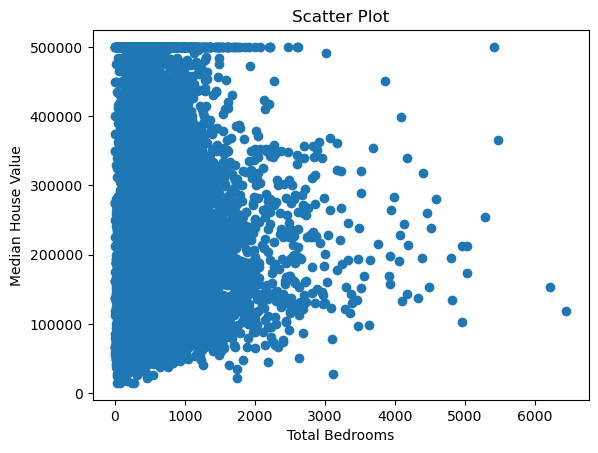

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X['total_bedrooms'], y)
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.title('Scatter Plot')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

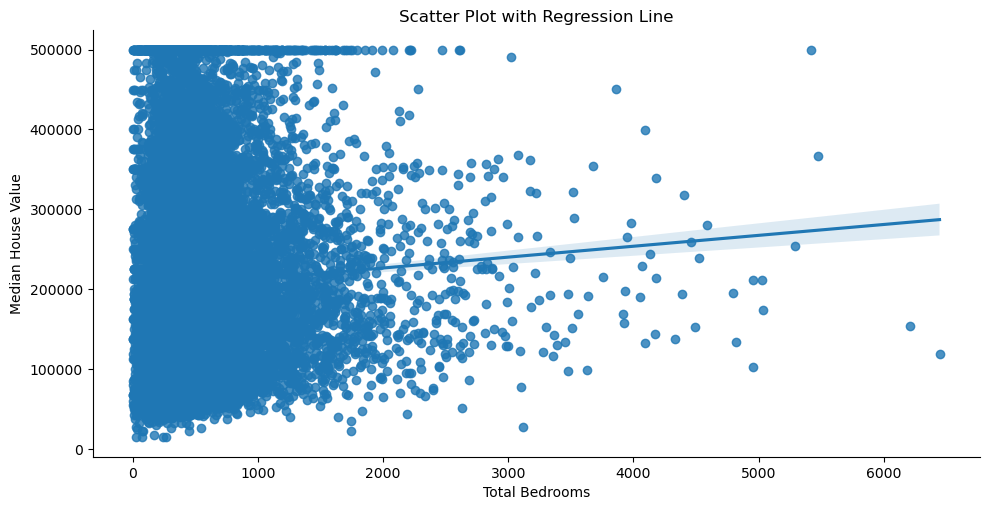

In [24]:
#lm plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lmplot(x='total_bedrooms', y='median_house_value', data=data, aspect=2)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.show()

In [ ]:
#Support Vector Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [29]:
model=DecisionTreeRegressor()

param_grid={
    'max_depth':(2,1000),
    'min_samples_leaf':(1,10),
    'min_samples_split':(2,20)
}

grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=2,

)

grid_search.fit(X,y)
best_score=grid_search.best_score_
best_param=grid_search.best_params_

print(best_param)
print(best_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 1000, 'min_samples_leaf': 10, 'min_samples_split': 20}
-6635199025.698019
